<a href="https://colab.research.google.com/github/MathBird17/Optimization/blob/main/OptimizacionUnaVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo Golden Section Search  *By Le Ruffy*

---


En el presente se comprobaran computacionalmente las propiedades vistas en clases del metodo Golden Section Search [1] haciendo uso del modulo Scipy. Para ello buscaremos el minimo de las siguientes tres funciones:
\begin{equation}
f_1(x)=(x-e^{-1})^2 +e^{-5(x-e^{-1})^2} \ \ : x\in [-1,3]
\end{equation}
\begin{equation}
f_2(x)=x^{x^4} \ \ : x\in [0,1]
\end{equation}
\begin{equation}
f_3(x)=x^{x^3 +x^2 +x} \ \ : x\in [0,1]
\end{equation}
El metodo de Golden Section Search consiste en usar propiedades de las funciones unimodales para asi lograr encontrar el minimo. Una funcion unimodal en cierto intervalo $I$ es aquella que posee un minimo en ese intervalo y es estrictamente creciente para valores mayores al minimo y estrictamente decreciente para valores menores al minimo, con esto lo que vamos a hacer es empezar por un intervalo e ir reduciendolo conservando una razon de cambio la cual es $\frac{1+\sqrt{5}}{2}$, esto nos permite asegurar que el error absoluto de las aproximaciones es menor o igual $\frac{1+\sqrt{5}}{2}$. Primero, vamos a visualizar las funciones:

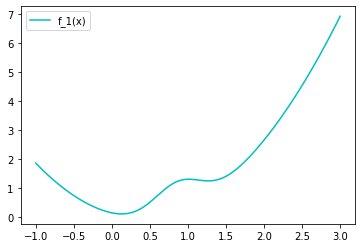

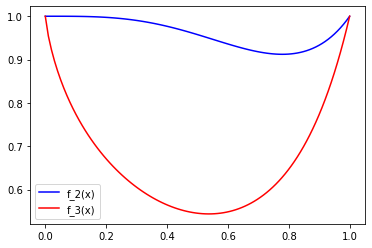

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
def f_1(x): 
    x0=np.exp(-1)
    return (x-x0)**2 + np.exp(-5*(x -  0.5 - x0)**2)
def f_2(x):
    k=x**4
    return x**k
def f_3(x):
    k=x**3 +x**2+x
    return x**k
x_1=np.linspace(-1,3,200)
x_2=np.linspace(0,1,100)
x_3=np.linspace(0,1,100)

plt.plot(x_1,f_1(x_1),color='c',label='f_1(x)')
plt.legend()
plt.show()
plt.plot(x_2,f_2(x_2),color='b',label='f_2(x)')
plt.plot(x_3,f_3(x_3),color='r',label='f_3(x)')
plt.legend()
plt.show()



Ahora procedemos a encontrar el minimo de las funciones con la funcion minimize_scalar del paquete scipy:

In [ ]:
#@title
from scipy import optimize
min1= optimize.minimize_scalar(f_1, (-1,3), method='golden')
min2= optimize.minimize_scalar(f_2, (0,1), method='golden')
min3= optimize.minimize_scalar(f_3, (0,1), method='golden')

print("minimo de f_1(x) en :"+ str(min1.x)+"\n minimo de f_2(x) en :"+ str(min2.x)+"\n minimo de f_3(x) en :"+ str(min3.x))

minimo de f_1(x) en :0.12812913545109078
 minimo de f_2(x) en :0.7788007853801979
 minimo de f_3(x) en :0.5374746197766294


A Continuacion vamos a graficar el error en cada iteracion y la velocidad de convergencia:




    Iteracion  Aproximacion
0         1.0      0.527864
1         2.0      0.527864
2         3.0     -0.055728
3         4.0     -0.055728
4         5.0      0.167184
5         6.0      0.167184
6         7.0      0.167184
7         8.0      0.167184
8         9.0      0.134662
9        10.0      0.134662
10       11.0      0.134662
11       12.0      0.126984
12       13.0      0.126984
13       14.0      0.126984
14       15.0      0.126984
15       16.0      0.128104
16       17.0      0.128104
17       18.0      0.128104
18       19.0      0.128104
19       20.0      0.128104
20       21.0      0.128104
21       22.0      0.128104
22       23.0      0.128143
23       24.0      0.128143
24       25.0      0.128128
25       26.0      0.128128
26       27.0      0.128128
27       28.0      0.128128
28       29.0      0.128128
29       30.0      0.128128
30       31.0      0.128129
31       32.0      0.128129
32       33.0      0.128129
33       34.0      0.128129
34       35.0      0

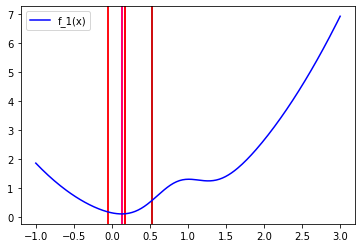

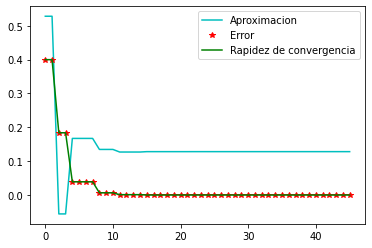

In [ ]:
#@title
min1.success=False 
iter = 1    # Numero de iteraciones
X1=[]   # i-esimo Minimo calculado en la iteracion i
Ratio1=[]  # Cociente entre el i-esimo minimo calculado y el siguiente
error1=[]  #Error de la i-esima aproximacion
while min1.success == False:   # Se crea un ciclo que para cuando la aproximacion suple el error de maquina
  min1= optimize.minimize_scalar(f_1, (-1,3), method='golden', options={"maxiter": iter}) 
  X1.append(min1.x)
  if iter>1:
    try:
      Ratio1.append((X1[iter-1]-0.12812913545109078)/(X1[iter-2]-0.12812913545109078))
    except:
      iter+=1
  iter+=1
for i in range(len(X1)): #Se calcula el error de la i-esima iteracion
  error1.append(abs(X1[i]-0.12812913545109078))
#Se muestra la tabla de las aproximaciones segun el numero de iteraciones
dict = {'Iteracion':range(len(X1))+np.ones(len(X1)),
        'Aproximacion': X1}
df = pd.DataFrame(dict)
df.dropna()
print(df)
#Se grafican las aproximaciones del minimo
for i in range(len(X1)):
  plt.axvline(x=X1[i],color=((i/1000000)**(1/100000), 0, i/100))
plt.plot(x_1,f_1(x_1),color='b',label='f_1(x)')
plt.legend()
plt.show()
#Se realiza la grafica de la aproximacion, el error y la rapidez de convergencia con respecto al numero de iteraciones
plt.plot(range(len(X1)),X1,color='c',label='Aproximacion')
plt.plot(range(len(X1)),error1,'*',color='r',label='Error')
plt.plot(range(len(X1)),error1,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show() 



Como podemos apreciar apartir de la iteracion numero 10 la aproximacion tendria un error menor a 0.001, ademas, vemos como en las primeras aproximaciones la rapidez con la cual el minimo se aproxima es bastante alta y a medida que se estabiliza el cambio entre iteraciones se hace menor. De esta manera realizamos el mismo procedimiento para las funciones $f_2$ y $f_3$:

    Iteracion  Aproximacion
0         1.0      0.618034
1         2.0      0.618034
2         3.0      0.763932
3         4.0      0.763932
4         5.0      0.777088
5         6.0      0.777088
6         7.0      0.780193
7         8.0      0.779007
8         9.0      0.778727
9        10.0      0.778834
10       11.0      0.778793
11       12.0      0.778793
12       13.0      0.778799
13       14.0      0.778799
14       15.0      0.778800
15       16.0      0.778801
16       17.0      0.778801
17       18.0      0.778801
18       19.0      0.778801
19       20.0      0.778801
20       21.0      0.778801


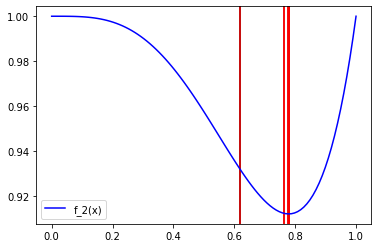

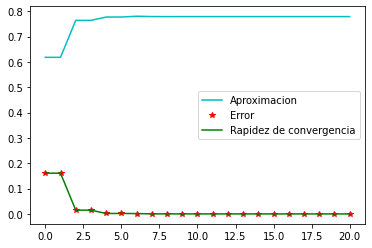

In [ ]:
#@title
min2.success=False
iter = 1
X2=[]
Ratio2=[]
error2=[]
while min2.success == False:
  min2= optimize.minimize_scalar(f_2, (0,1), method='golden', options={"maxiter": iter})
  X2.append(min2.x)
  if iter>1:
    try:
      Ratio.append((X2[iter-1]-0.7788007853801979)/(X2[iter-2]-0.6065306545614861))
    except:
      iter+=1
  iter+=1
for i in range(len(X2)):
  error2.append(abs(X2[i]-0.7788007853801979))
#Se muestra la tabla de las aproximaciones segun el numero de iteraciones
dict = {'Iteracion':range(len(X2))+np.ones(len(X2)),
        'Aproximacion': X2}
df = pd.DataFrame(dict)
df.dropna()
print(df)
for i in range(len(X2)):
  plt.axvline(x=X2[i],color=((i/100)**(1/100), 0, 0))
plt.plot(x_2,f_2(x_2),color='b',label='f_2(x)')
plt.legend()
plt.show()
plt.plot(range(len(X2)),X2,color='c',label='Aproximacion')
plt.plot(range(len(X2)),error2,'*',color='r',label='Error')
plt.plot(range(len(X2)),error2,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show()

    Iteracion  Aproximacion
0         1.0      0.618034
1         2.0      0.618034
2         3.0      0.618034
3         4.0      0.527864
4         5.0      0.527864
5         6.0      0.527864
6         7.0      0.527864
7         8.0      0.541020
8         9.0      0.541020
9        10.0      0.535995
10       11.0      0.535995
11       12.0      0.537914
12       13.0      0.537914
13       14.0      0.537181
14       15.0      0.537181
15       16.0      0.537461
16       17.0      0.537461
17       18.0      0.537461
18       19.0      0.537461
19       20.0      0.537461
20       21.0      0.537486
21       22.0      0.537486
22       23.0      0.537477
23       24.0      0.537477
24       25.0      0.537477
25       26.0      0.537474
26       27.0      0.537474
27       28.0      0.537474
28       29.0      0.537474
29       30.0      0.537475
30       31.0      0.537475
31       32.0      0.537475
32       33.0      0.537475
33       34.0      0.537475
34       35.0      0

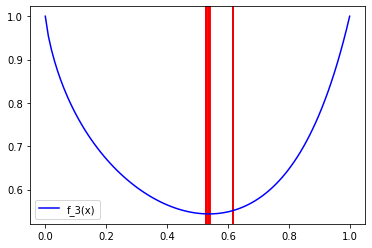

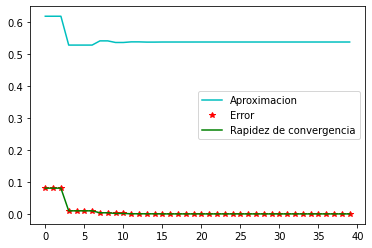

In [ ]:
#@title
min3.success=False
iter = 1
X3=[]
Ratio3=[]
error3=[]
while min3.success == False:
  min3= optimize.minimize_scalar(f_3, (0,1), method='golden', options={"maxiter": iter})
  X3.append(min3.x)
  if iter>1:
    try:
      Ratio1.append((X3[iter-1]-0.5374746197766294)/(X3[iter-2]-0.5374746197766294))
    except:
      iter+=1
  iter+=1
for i in range(len(X3)):
  error3.append(abs(X3[i]-0.5374746197766294))
#Se muestra la tabla de las aproximaciones segun el numero de iteraciones
dict = {'Iteracion':range(len(X3))+np.ones(len(X3)),
        'Aproximacion': X3}
df = pd.DataFrame(dict)
df.dropna()
print(df)
for i in range(len(X3)):
  plt.axvline(x=X3[i],color=((i/100)**(1/100), 0, 0))
plt.plot(x_3,f_3(x_3),color='b',label='f_3(x)')
plt.legend()
plt.show()

plt.plot(range(len(X3)),X3,color='c',label='Aproximacion')
plt.plot(range(len(X3)),error3,'*',color='r',label='Error')
plt.plot(range(len(X3)),error3,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show()

## Excepciones
Ahora vamos a ver una funcion para la cual el metodo falla segun el dominio que le pongamos, y esta es la funcion:
\begin{equation}
f_4(x)=(0.1x+1)cos(10x)+xsin(x) \ \ : x\in [0,2\pi]
\end{equation}
Si en la funcion minimize.scalar ponemos los dominios $[0,3\pi]$ , $[0,2\pi]$ y $[0,5]$ vemos que nos devuelve un minimo distinto apesar de que claramente en la grafica se observa que el minimo es el mismo en los tres intervalos. La razon del fallo es debido a que la funcion $f_4$ no es unimodal y esto causa que el algoritmo quede "atrapado" en unos intervalos que no incluyen al minimo de todo el intervalo. Para solucionarlo reducimos el intervalo a uno en el cual la funcion si sea unimodal.

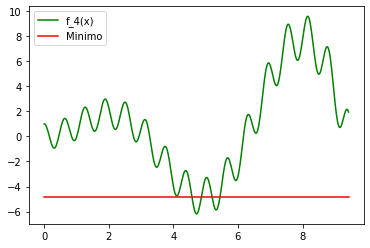

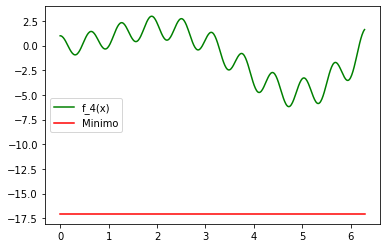

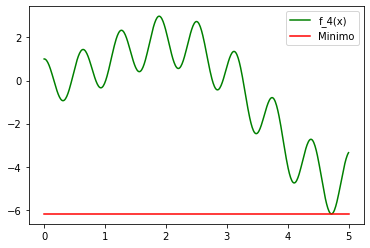

In [ ]:
#@title

def f_4(x):
    k=(0.1*x+1)*np.cos(10*x)+x*np.sin(x)
    return k

# Con dominio [0,3pi]
x_4=np.linspace(0,3*np.pi,500)
min4= optimize.minimize_scalar(f_4, (0,3*np.pi), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()

# Con dominio [0,2pi]
x_4=np.linspace(0,2*np.pi,500)
min4= optimize.minimize_scalar(f_4, (0,2*np.pi), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()

# Con dominio [0,5]
x_4=np.linspace(0,5,500)
min4= optimize.minimize_scalar(f_4, (0,5), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()


Observamos que cuando el dominio es $[0,2\pi]$ nos arroja un minimo que ni siquiera esta dentro del rango de la funcion, entonces vamos a ver que es lo que sucede en cada iteracion:

In [ ]:
#@title
iter = 1
X4=[]
min4.success = False
while min4.success == False:
  min4= optimize.minimize_scalar(f_4, (0,2*np.pi), method='golden', options={"maxiter": iter})
  X4.append(min4.x)
  iter=iter+1
dict = {'Iteracion':range(len(X4))+np.ones(len(X4)),
        'Aproximacion': X4}
df = pd.DataFrame(dict)
df.dropna()
print(df)

    Iteracion  Aproximacion
0         1.0    -16.449593
1         2.0    -16.449593
2         3.0    -17.932852
3         4.0    -17.932852
4         5.0    -17.366297
5         6.0    -17.016147
6         7.0    -17.016147
7         8.0    -17.016147
8         9.0    -17.016147
9        10.0    -17.067233
10       11.0    -17.067233
11       12.0    -17.047720
12       13.0    -17.047720
13       14.0    -17.047720
14       15.0    -17.043114
15       16.0    -17.043114
16       17.0    -17.043114
17       18.0    -17.043114
18       19.0    -17.043786
19       20.0    -17.043786
20       21.0    -17.043786
21       22.0    -17.043786
22       23.0    -17.043786
23       24.0    -17.043786
24       25.0    -17.043748
25       26.0    -17.043748
26       27.0    -17.043763
27       28.0    -17.043763
28       29.0    -17.043757
29       30.0    -17.043757
30       31.0    -17.043757
31       32.0    -17.043757
32       33.0    -17.043757
33       34.0    -17.043757
34       35.0    -17

Se puede observar que desde la iteracion 1 el metodo falla arrojando un valor en x de -16.449593 que esta por fuera del dominio $[0,2\pi]$, la falla no esta tampoco en el hecho de que la funcion *minimize* no reconozca el dominio ya que tambien se probo con el dominio $[0,6]$ y tambien se obtuvo un minimo en 11.00055288721158, es decir el metodo falla por completo ya que parece no estar en el intervalo deseado. 

In [ ]:
#@title
print("Minimo cuando el dominio es [0,2]= "+str(optimize.minimize_scalar(f_4, (0,6), method='golden').x))

Minimo cuando el dominio es [0,2]= 11.00055288721158


# Metodo Brent.
El metodo Brent es una mejoria del metodo de la Golden Search, ya que le añade a este ultimo la interpolacion cuadratica inversa [2] cuando sea posible, esta interpolacion consiste en tomar tres puntos en una curva y aproximarla con una parabola aprovechando el hecho de que por estos tres puntos pasa una unica parabola. De esta manera podriamos tener que el coste en cada iteracion podria ser mayor, sin embargo, esto se compensa con el hecho de que el metodo Brent normalmente requiere menos iteraciones. A continuacion vamos a comparar la rapidez de convergencia de los dos metodos con las funciones anteriormente tratadas:

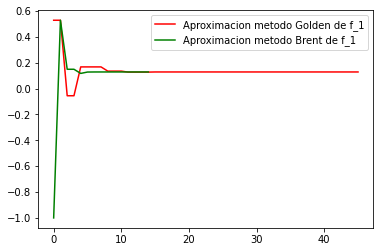

In [ ]:
#@title
min1_brent= optimize.minimize_scalar(f_1, (-1,3), method='brent')
min1_brent.success=False
iter = 1
X_1=[]
Ratio_1=[]
error_1=[]
while min1_brent.success == False:
  min1_brent= optimize.minimize_scalar(f_1, (-1,3), method='brent', options={"maxiter": iter})
  X_1.append(min1_brent.x)
  iter+=1
plt.plot(range(len(X1)),X1,color='r',label='Aproximacion metodo Golden de f_1')
plt.plot(range(len(X_1)),X_1,color='g',label='Aproximacion metodo Brent de f_1')
plt.legend()
plt.show()

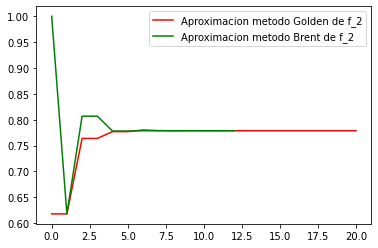

In [ ]:
#@title
min2_brent= optimize.minimize_scalar(f_2, (0,1), method='brent')
min2_brent.success=False
iter = 1
X_2=[]
Ratio_2=[]
error_2=[]
while min2_brent.success == False:
  min2_brent= optimize.minimize_scalar(f_2, (0,1), method='brent', options={"maxiter": iter})
  X_2.append(min2_brent.x)
  iter+=1
plt.plot(range(len(X2)),X2,color='r',label='Aproximacion metodo Golden de f_2')
plt.plot(range(len(X_2)),X_2,color='g',label='Aproximacion metodo Brent de f_2')
plt.legend()
plt.show()

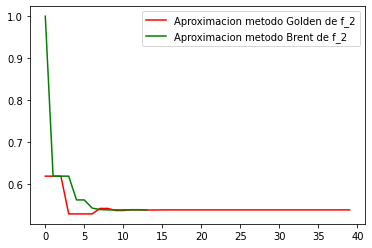

In [ ]:
#@title
min3_brent= optimize.minimize_scalar(f_3, (0,1), method='brent')
min3_brent.success=False
iter = 1
X_3=[]
Ratio_3=[]
error_3=[]
while min3_brent.success == False:
  min3_brent= optimize.minimize_scalar(f_3, (0,1), method='brent', options={"maxiter": iter})
  X_3.append(min3_brent.x)
  iter+=1
plt.plot(range(len(X3)),X3,color='r',label='Aproximacion metodo Golden de f_2')
plt.plot(range(len(X_3)),X_3,color='g',label='Aproximacion metodo Brent de f_2')
plt.legend()
plt.show()

# Conclusiones.
En terminos generales vimos que el metodo Brent tiene una rapidez de convergencia mayor a la del metodo del Golden Search, sin embargo, en las funciones $f_2$ y $f_3$ se pudo observar que ambos metodos no difieren tanto en la velocidad de convergencia, aun asi el metodo Brent requiere menos iteraciones para dar una aproximacion como certera. De esta manera, si tenemos una tolerancia especifica es posible que el metodo del Golden Search requiera menos coste computacional y tenga los mismos resultados que el metodo Brent, aunque esto es mas bien una excepcion que una regla, por lo que lo mejor es siempre usar el metodo Brent.  \
Ademas, vimos en el ejemplo con la funcion $f_4$ hay que tener muy presente el hecho de que estos metodos son para optimizar funciones *unimodales* , por lo tanto lo ideal seria encontrar analiticamente un intervalo donde la funcion sea unimodal y realizar la optimizacion en ese intervalo.

# Referencias.
[1] Heath, Michael. *Scientific Computing. An Introductory survey*,1997.\
[2] Scipy. Optimize Package user guide. https://docs.scipy.org/doc/scipy/reference/optimize.minimize_scalar-brent.html#optimize-minimize-scalar-brent

